# Deeporvillage Take Home Test

## Contents

### Exploratory data analysis

### Feature engineering

### Training

### Model diagnostics


In [1]:
# Read necessary libraries, import data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 100000000)
import warnings
df = pd.read_excel('input_ml_data.xlsx', sheet_name='E Comm')

In [121]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [2]:
# Perform necessary changes in data types
df.CustomerID = df.CustomerID.astype(object)
df.CityTier = df.CityTier.astype(object)

In [4]:
# import necessary modules
from src.preprocessing import feature_engineering, eda 

fe = feature_engineering.Preprocess()
eda = eda.Eda()


<AxesSubplot:title={'center':'Churn distribution'}, ylabel='Frequency'>

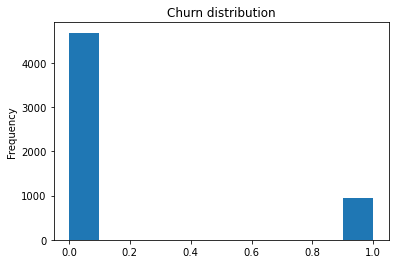

In [123]:
## Exploratory Data Analysis

## Plot target label distribution

df.Churn.plot.hist(title = 'Churn distribution')

`Observations`: 

- There is a clear imbalance problem
- Majority class is 0 (no churn)
- There are severak techniques to deal with these cases 


In [6]:
# Look for missing values
eda.missing_values_table(df)

Your selected dataframe has 20 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
DaySinceLastOrder,307,5.5
OrderAmountHikeFromlastYear,265,4.7
Tenure,264,4.7
OrderCount,258,4.6
CouponUsed,256,4.5
HourSpendOnApp,255,4.5
WarehouseToHome,251,4.5


`Observations`: 

- DaySinceLastOrder has the most missing values with a 5.5 % out of total values
- All 7 features are arounf 40% of missing values out total


<AxesSubplot:title={'center':'Ternure relationship with Churn '}, xlabel='Tenure', ylabel='Density'>

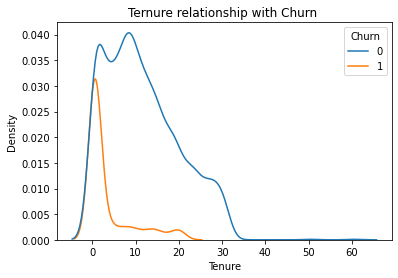

In [124]:
#  Plot some distributions

plt.title('Ternure relationship with Churn ')
sns.kdeplot(df['Tenure'] , hue= df['Churn'])


`Observations`: 

- Plot makes sense. Overall customers have a ternure from 0- 10
- Churned customers have the lowest tenure from 0-5

/Users/servandodavidtorresgarcia/Servando/personal-pipeline/src/preprocessing/eda.py:112: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


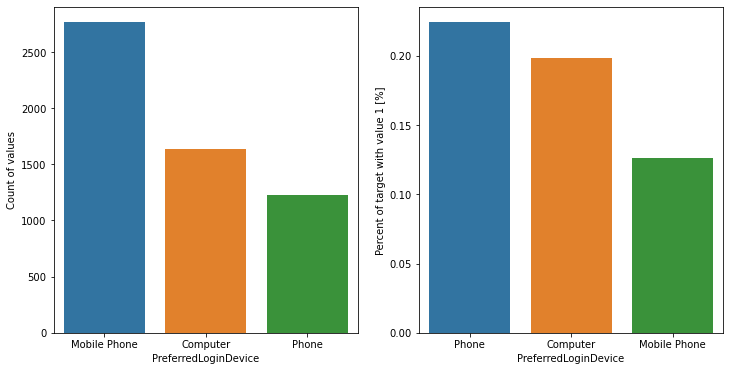

In [16]:
eda.plot_cat_feature(df, 'PreferredLoginDevice', 'Churn')


`Observations`: 

- There is two categories than could potentially be together, 'Mobile Phone' and 'Phone'
- Both Phone and Computer devices are related with churn with 20%

<AxesSubplot:title={'center':'Distance to home relationship with Churn '}, xlabel='WarehouseToHome', ylabel='Density'>

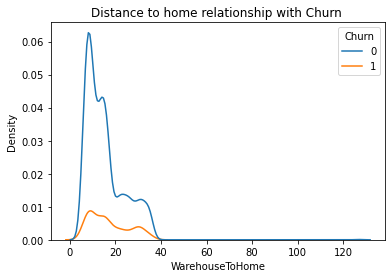

In [17]:


plt.title('Distance to home relationship with Churn ')
sns.kdeplot(df['WarehouseToHome'] , hue= df['Churn'])


/Users/servandodavidtorresgarcia/Servando/personal-pipeline/src/preprocessing/eda.py:112: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


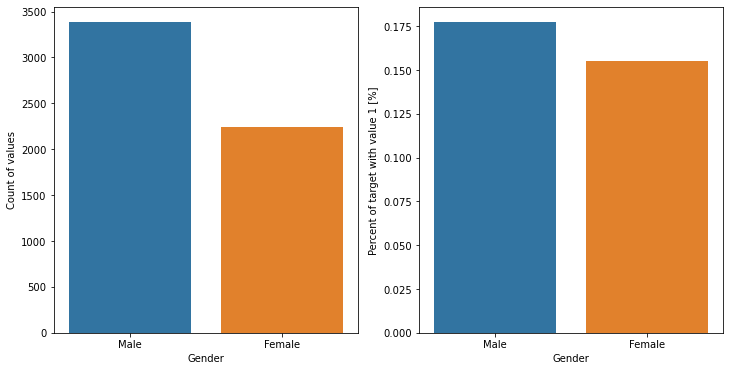

In [18]:
eda.plot_cat_feature(df, 'Gender', 'Churn')

`Observations`: 

- Plot shows there is no discrimination on gender with relationship with Churn

<AxesSubplot:title={'center':'SatisfactionScore relationship with Churn '}, xlabel='SatisfactionScore', ylabel='Density'>

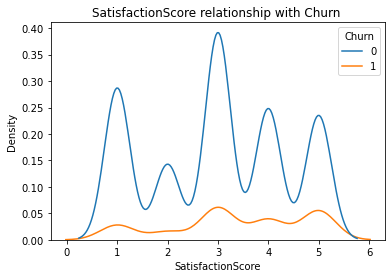

In [31]:


plt.title('SatisfactionScore relationship with Churn ')
sns.kdeplot(df['SatisfactionScore'] , hue= df['Churn'])


`Observations`: 

- This is counterintuitive. Assuming 5 is the completley satisfied. There are some picks in churn on customers with score 3 and 5

<AxesSubplot:title={'center':'DaySinceLastOrder relationship with Churn '}, xlabel='DaySinceLastOrder', ylabel='Density'>

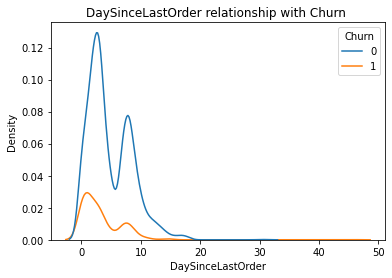

In [33]:

plt.title('DaySinceLastOrder relationship with Churn ')
sns.kdeplot(df['DaySinceLastOrder'] , hue= df['Churn'])

`Observations`: 

- Plot shows there is a slight pick in churn custoemrs between 0 and 1 days and 9 days since last order

<AxesSubplot:title={'center':'CashbackAmount relationship with Churn '}, xlabel='CashbackAmount', ylabel='Density'>

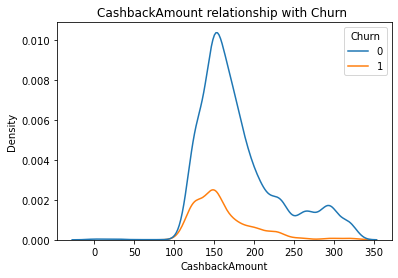

In [34]:
plt.title('CashbackAmount relationship with Churn ')
sns.kdeplot(df['CashbackAmount'] , hue= df['Churn'])
	

`Observations`: 

- Customers with around 150 cash being returned are apparantly showing churn

In [40]:
# Check correlations with customer

correlations = df.corr()['Churn'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(5))
print('\nMost Negative Correlations:\n', correlations.head(5))

Most Positive Correlations:
 CityTier                    0.084703
SatisfactionScore           0.105481
NumberOfDeviceRegistered    0.107939
Complain                    0.250188
Churn                       1.000000
Name: Churn, dtype: float64

Most Negative Correlations:
 Tenure                        -0.349408
DaySinceLastOrder             -0.160757
CashbackAmount                -0.154118
OrderCount                    -0.028697
OrderAmountHikeFromlastYear   -0.010058
Name: Churn, dtype: float64


In [3]:
# Feature engineeing
fe_df = df.copy()

fe_df['Ternure_mean'] = fe_df.groupby('CustomerID')['Tenure'].transform("mean")
fe_df['WarehouseToHome_mean'] = fe_df.groupby('CustomerID')['WarehouseToHome'].transform("mean")
fe_df['HourSpendOnApp_mean'] = fe_df.groupby('CustomerID')['HourSpendOnApp'].transform("mean")
fe_df['SatisfactionScore_mean'] = fe_df.groupby('CustomerID')['SatisfactionScore'].transform("mean")
fe_df['Complain_mean'] = fe_df.groupby('CustomerID')['Complain'].transform("mean")

fe_df['Ternure_mean_gender'] = fe_df.groupby('Gender')['Tenure'].transform("mean")
fe_df['WarehouseToHome_mean_gender'] = fe_df.groupby('Gender')['WarehouseToHome'].transform("mean")
fe_df['HourSpendOnApp_mean_gender'] = fe_df.groupby('Gender')['HourSpendOnApp'].transform("mean")
fe_df['SatisfactionScore_mean_gender'] = fe_df.groupby('Gender')['SatisfactionScore'].transform("mean")
fe_df['Complain_mean_gender'] = fe_df.groupby('Gender')['Complain'].transform("mean")


`Observations`: 

- As basic feature engineering I wanted to do some agregations on data that I think could be interesting
- I use only mean as metric to evalaute this aggreations. 
- I find interesting to see mean value grouped by custoemr on different variables such as hours spend on app
- I onrder to undeerstand customers. I think it makes sense to do some profiling and understand customers with a very basic variable like gender

In [12]:
features = fe_df.copy()
features.select_dtypes(['object', 'category']).apply(pd.Series.nunique, axis = 0).sort_values(ascending=False)

CustomerID              5630
PreferredPaymentMode       7
PreferedOrderCat           6
PreferredLoginDevice       3
CityTier                   3
MaritalStatus              3
Gender                     2
dtype: int64

In [13]:
# Minor adjustmnest to reduce dimensionality on cateogrical variaables

features['PreferredLoginDevice'] = features.PreferredLoginDevice.str.replace('Mobile Phone', 'Phone')
features['PreferedOrderCat'] = features.PreferedOrderCat.str.replace('Mobile Phone', 'Mobile')

In [28]:
# Prepare dataset for training

target = features.pop('Churn') 
features['Churn'] = target
X = features.iloc[:, :-1]
X.pop('CustomerID')
y = features['Churn']


In [30]:
X.shape

(5630, 28)

In [31]:
# caategorical encoding values encoding

X = pd.get_dummies(X)

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")  
X[:] = imputer.fit_transform(X)

In [33]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from  collections import Counter

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('RandomUnderSampler dataset shape', Counter(y_rus))

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable 
x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('RandomOverSampler dataset shape', Counter(y_ros))



original dataset shape: Counter({0: 4682, 1: 948})
RandomUnderSampler dataset shape Counter({0: 948, 1: 948})
Original dataset shape Counter({0: 4682, 1: 948})
RandomOverSampler dataset shape Counter({1: 4682, 0: 4682})


`Observations`: 

- So far we have prepared the dataset for modeling
- We choose mean imputation as our strategy to impute missing values  
- One hot encoding for categorical variables, since we dont have high dimension on those
- To deal with the imbalance class problem we will choose RadomUnderSampler since increasing values on the minority class can lead to overfitting. Although  Undersampling may lead to some problems since we do not posses sufficient data to be confident to reduce it

In [34]:
# Set up baseline
from numpy import mean
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, train_test_split

# Initialize baseline with fixed random_state
baseline_rus = RandomForestClassifier(random_state=1, class_weight = 'balanced', max_depth=)# limit max depth

# train test split
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(x_rus, y_rus, test_size=0.3, random_state=1)


In [35]:
# Scailing data
from sklearn.preprocessing import StandardScaler

# Initialize  Standarization 
sc = StandardScaler()
X_train_rus_sc = sc.fit_transform(X_train_rus)
X_test_rus_sc = sc.fit_transform(X_test_rus)

X_rus_sc = sc.fit_transform(x_rus)
# Fitting model with data
baseline_rus.fit(X_train_rus_sc, y_train_rus)

print(f'Baseline Training Accuracy: {np.mean(baseline_rus.predict(X_train_rus_sc) == y_train_rus)*100:.2f}% ')
print(f'Baseline Test Accuracy: {np.mean(baseline_rus.predict(X_test_rus) == y_test_rus)*100:.2f}% ')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(baseline_rus, X_rus_sc, y_rus, scoring='roc_auc', cv=cv)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Baseline Training Accuracy: 100.00% 
Baseline Test Accuracy: 53.78% 


/Users/servandodavidtorresgarcia/miniconda3/envs/cluster-t/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Mean ROC AUC: 0.984


/Users/servandodavidtorresgarcia/miniconda3/envs/cluster-t/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


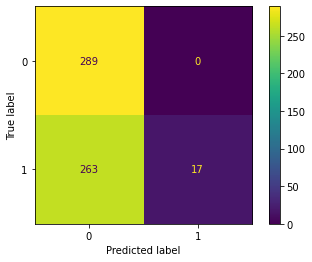

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_rus = confusion_matrix(y_test_rus,baseline_rus.predict(X_test_rus))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rus)
disp.plot()

In [37]:
# Model Diagnsotics 

from sklearn.model_selection import validation_curve


num_estimators = [10,20,30,50,100,200,300,400]
train_scores, test_scores = validation_curve(
                estimator=baseline_rus, 
                X=X_train_rus_sc, 
                y=y_train_rus, 
                param_name='n_estimators', 
                param_range = num_estimators,
                scoring='roc_auc',
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

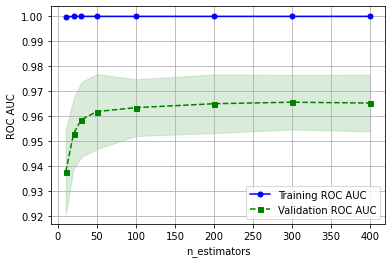

In [38]:
plt.plot(num_estimators, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training ROC AUC')

plt.fill_between(num_estimators, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(num_estimators, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation ROC AUC')

plt.fill_between(num_estimators, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('n_estimators')
plt.ylabel('ROC AUC')
plt.show(--

In [39]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores =\
                learning_curve(estimator=baseline_rus,
                               X=X_train_rus_sc,
                               y=y_train_rus,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=5,
                               scoring= 'roc_auc'
                               )

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

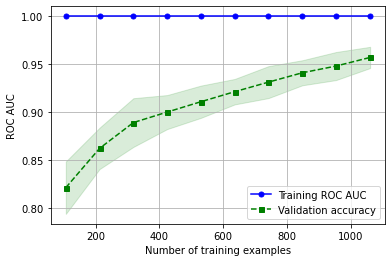

In [41]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training ROC AUC')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('ROC AUC')
plt.legend(loc='lower right')
plt.show()

`Observations and future work`: 

- Confusion matrix states that we are still dealing with an imbalanced class problem even though we used an under-sampling data
- To do diagnostics in our model and deal  with overfitting we choose learning curves and validation curves 
- Validation curve shows that below 200 iterations is a valid number to set in our random forest
- Learning curve shows that if we increase the number of training samples the gap between training and validation scores becomes less wide. This could be related to the technique used to deal with imbalance in class

